# Сonfidence intervals

## Task 1

Generate a sample $X_1, ...,X_{100}$ from the uniform distribution on the segment $[0, \theta]$, the Cauchy distribution with the shift $\theta$, the Poisson distribution with the parameter $\theta$ , and the Gamma distribution with the parameters $(\theta, \lambda)$. In the first three cases, take $\theta = 10$ and take $(\theta, \lambda) = (10, 3).$ For the confidence level $\alpha = 0.95$ for all $n \leq 100$, construct the confidence intervals obtained in the theoretical problems.

## Solution

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

Declare global constants

In [21]:
theta = 10
lambd = 3
alpha = 0.95
n = 100

From the solution of the theoretical problem, we know the confidence intervals of the confidence level $ \alpha$ for the parameter $\theta$ in an equal distribution on the segment $[0, \theta]$. Using the statistics $\overline{X}$, $X_{(1)}$ and $X_ {(n)}$, their values are equal, respectively $\left(\frac{2\overline{X}\sqrt{3n(1 - \alpha)}}{\sqrt{3n(1 - \alpha)} + 1}, \frac{2\overline{X}\sqrt{3n(1 - \alpha)}}{\sqrt{3n(1 - \alpha)} - 1}\right)$, $\left(X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}}\right)$ and $\left(X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}}\right)$.

Let's create a function in which we generate a sample from a uniform distribution and calculate the extreme values of the three confidence intervals in order of correspondence to the statistics as in the condition.

In [37]:
def confidence_interval_uniform():
    sample = sps.uniform.rvs(loc=0, scale=theta, size=n)

    x_1 = np.minimum.accumulate(sample)        
    x_n = np.maximum.accumulate(sample)
    x_mean = np.cumsum(sample) / (np.arange(n) + 1)
    
    first_start = (2 * x_mean * np.sqrt(3 * n * (1 - alpha))
        ) / (np.sqrt(3 * n * (1 - alpha)) + 1)
    first_end = (2 * x_mean * np.sqrt(3 * n * (1 - alpha))
        ) / (np.sqrt(3 * n * (1 - alpha)) - 1)

    second_start = x_1
    second_end = x_1 / (1 - alpha ** (1 / (np.arange(n) + 1)))

    third_start = x_n
    third_end = x_n / (1 - alpha) ** (1 / (np.arange(n) + 1))
    
    return first_start, first_end, second_start, second_end, third_start, third_end

Get the values on the borders of confidence intervals.

In [23]:
first_start, first_end, second_start, second_end, third_start, third_end = confidence_interval_uniform()

Let's build a comparative graph with the selected areas of the corresponding confidence intervals, and also note the value of the $\theta$ parameter on it.

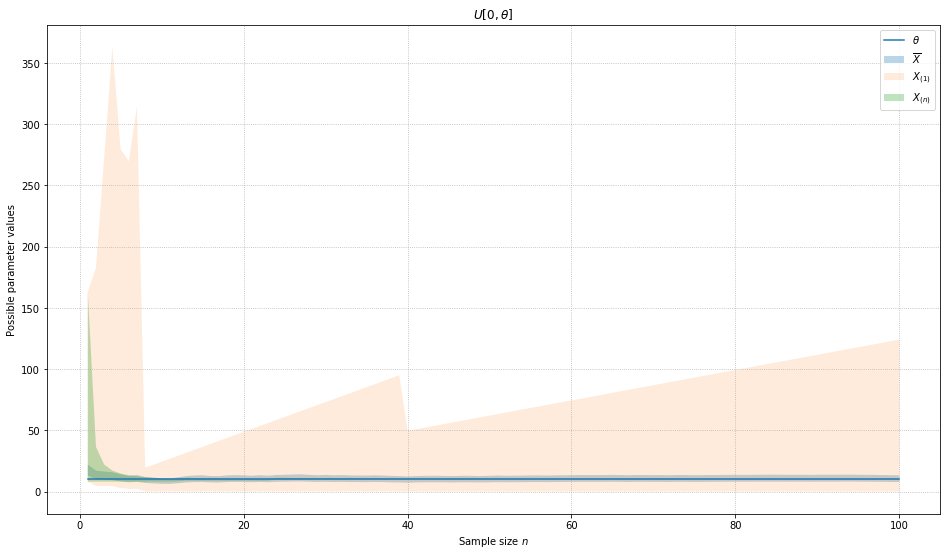

In [27]:
plt.figure(figsize=(16, 9))
plt.plot(np.arange(n) + 1, np.zeros(n) + theta, label='$\\theta$')

plt.fill_between(np.arange(n) + 1, first_start, 
    first_end, label='$\overline{X}$', alpha=0.3)
plt.fill_between(np.arange(n) + 1, second_start, 
    second_end, label='$X_{(1)}$', alpha=0.15)
plt.fill_between(np.arange(n) + 1, third_start, 
    third_end, label='$X_{(n)}$', alpha=0.3)
    
plt.title('$U[0, \\theta]$', fontsize=12)

plt.xlabel('Sample size $n$')
plt.ylabel('Possible parameter values')
plt.legend()
plt.grid(ls=':')
plt.show()

Due to abnormal values for the confidence interval based on the $X_{(1)} $ statistics, we exclude this confidence interval from consideration and construct a new graph.

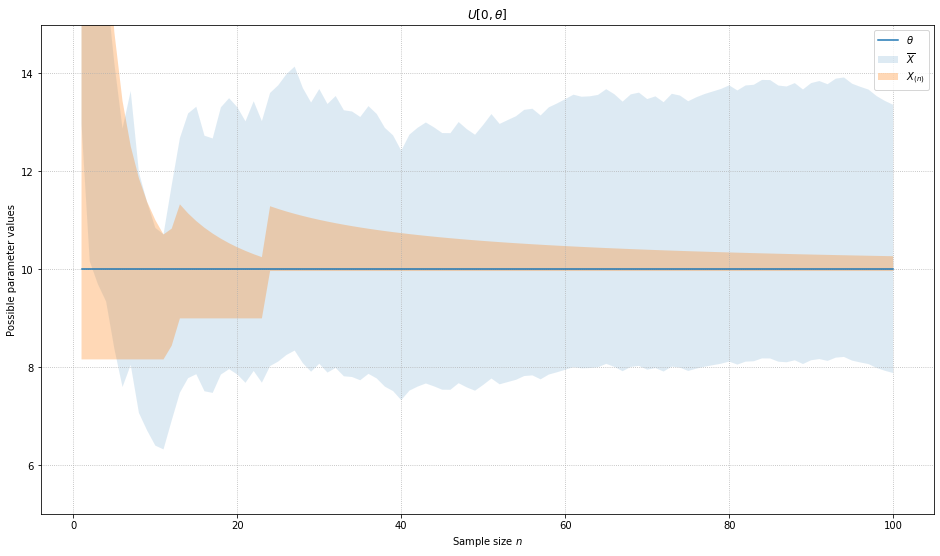

In [36]:
plt.figure(figsize=(16, 9))
plt.plot(np.arange(n) + 1, np.zeros(n) + theta, label='$\\theta$')

plt.fill_between(np.arange(n) + 1, first_start, 
    first_end, label='$\overline{X}$', alpha=0.15)
plt.fill_between(np.arange(n) + 1, third_start, 
    third_end, label='$X_{(n)}$', alpha=0.3)
    
plt.title('$U[0, \\theta]$', fontsize=12)

plt.xlabel('Sample size $n$')
plt.ylabel('Possible parameter values')
plt.ylim((5, 1.5 * theta))

plt.legend()
plt.grid(ls=':')
plt.show()

The value of the asymptotic confidence interval for the $\theta$ parameter in the Cauchy distribution with the $\theta $ shift is known from the theoretical problem. It is equal to $\left(\hat{\mu} - \frac{\pi}{2\sqrt{n} \cdot z_{\frac{1 + \alpha}{2}}}, \hat{\mu} - \frac{\pi}{2\sqrt{n} \cdot z_{\frac{1 - \alpha}{2}}}\right)$, where $z_{p}$ - $p$-quantile of the standard normal law, $\hat{\mu}$ - sample median.

Let's create a function for calculating the asymptotic confidence interval. Generate a sample from the Cauchy distribution, calculate an array of sample medians for each sample size, and calculate values within the bounds of the asymptotic confidence interval.

In [28]:
def confidence_interval_cauchy():
    sample = sps.cauchy.rvs(theta, size=n)

    A = np.tril(sample)
    A[np.triu_indices(n, k=1)] = np.nan
    medians = np.nanmedian(A, axis=1)

    start_confidence_cauchy = medians - np.pi / (
        2 * np.sqrt((np.arange(n) + 1)) * sps.norm.ppf((1 + alpha)/2)) 
    end_confidence_cauchy = medians - np.pi / (
        2 * np.sqrt((np.arange(n) + 1)) * sps.norm.ppf((1 - alpha)/2)) 
    
    return start_confidence_cauchy, end_confidence_cauchy

Let's create a function for plotting the parameter value and the confidence interval.

In [29]:
def plotting(start, end, name, ylim_low, ylim_top):
    plt.figure(figsize=(16, 9))

    plt.plot(np.arange(n) + 1, np.zeros(n) + theta, label='$\\theta$')
    plt.fill_between(np.arange(n) + 1, start, end, 
                     label='Confidence interval', alpha=0.15)

    plt.title(name, fontsize=12)

    plt.xlabel('Sample size $n$')
    plt.ylabel('Possible parameter values')
    plt.ylim((ylim_low, ylim_top))

    plt.legend()
    plt.grid(ls=':')
    plt.show()

We get the values at the boundaries and plot the asymptotic confidence interval for the Cauchy distribution.

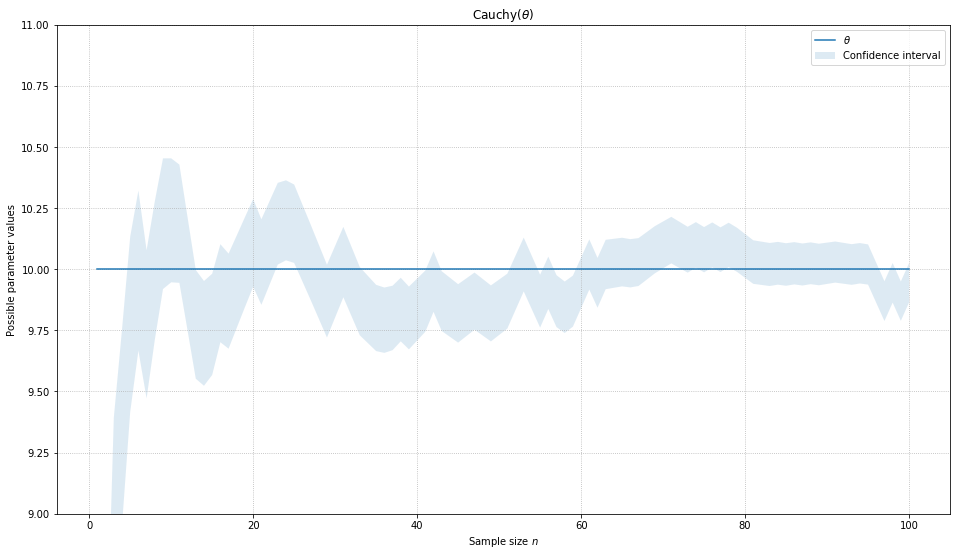

In [31]:
start_confidence_cauchy, end_confidence_cauchy = confidence_interval_cauchy()
plotting(start_confidence_cauchy, end_confidence_cauchy,
         'Cauchy($\\theta$)', theta-1, theta+1)

The value of the asymptotic confidence interval for the parameter $\theta$ in the Poisson distribution is known from the theoretical problem. It is equal to $\left(\overline{X} + \sqrt{\overline{X}}\frac{z_{\frac{1 - \alpha}{2}}}{\sqrt{n}}, \overline{X} + \sqrt{\overline{X}}\frac{z_{\frac{1 + \alpha}{2}}}{\sqrt{n}}\right)$, where $z_{p}$ - $p$-quantile of the standard normal distribution.

The function that generates a sample and calculates values at the boundaries of the interval is described below.

In [32]:
def confidence_interval_poiss():
    sample = sps.poisson.rvs(theta, size=n)
    x_mean = np.cumsum(sample) / (np.arange(n) + 1)
    
    start_confidence_poiss = x_mean + np.sqrt(x_mean) * sps.norm.ppf(
        (1 - alpha) / 2) / np.sqrt(np.arange(n) + 1)
    end_confidence_poiss = x_mean + np.sqrt(x_mean) * sps.norm.ppf(
        (1 + alpha) / 2) / np.sqrt(np.arange(n) + 1)
    
    return start_confidence_poiss, end_confidence_poiss

Get the confidence interval for Poisson distribution and build a graph.

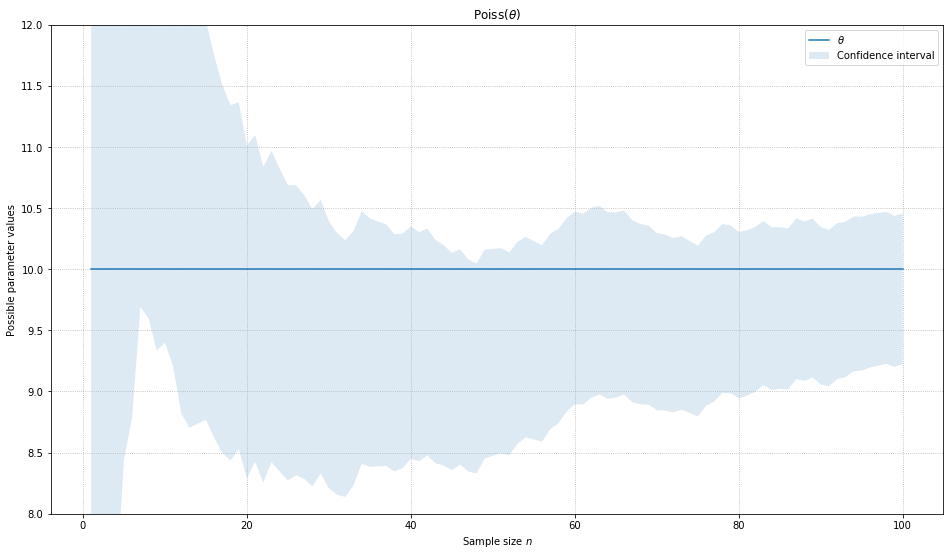

In [34]:
start_confidence_poiss, end_confidence_poiss = confidence_interval_poiss()
plotting(start_confidence_poiss, end_confidence_poiss,
         'Poiss($\\theta$)', theta-2, theta+2)

The value of the asymptotic confidence interval for the parameter $\theta$ in the Gamma distribution is known from the theoretical problem. It is equal to $\left(\frac{\lambda}{\overline{X}} - z_{\frac{1 + \alpha}{2}}\cdot\frac{\sqrt{\lambda}}{\overline{X}\sqrt{n}}, \frac{\lambda}{\overline{X}} + z_{\frac{1 + \alpha}{2}}\cdot\frac{\sqrt{\lambda}}{\overline{X}\sqrt{n}}\right)$ in the case when $\lambda$ is known and $\left(\frac{\overline{X}}{s^2} - z_{\frac{1 + \alpha}{2}}\cdot\sqrt{\frac{2\overline{X}^2/s^2 + 3}{s^2n}}, \frac{\overline{X}}{s^2} + z_{\frac{1 + \alpha}{2}}\cdot\sqrt{\frac{2\overline{X}^2/s^2 + 3}{s^2n}}\right)$ else.

In the function described below, a sample is generated and the boundary values of the asymptotic confidence intervals are calculated first when $\lambda$ is known, and then when $\lambda$ is unknown.

In [38]:
def confidence_interval_gamma():
    sample = sps.gamma.rvs(a=lambd, scale=1/theta, size=n)

    x_mean = np.cumsum(sample) / (np.arange(n) + 1)
    sample_var = np.cumsum(sample**2)/(np.arange(n) + 1) - (np.cumsum(sample)/(np.arange(n) + 1))**2
    sample_var[0] = 1
    
    start_gamma_lambda = lambd / x_mean - sps.norm.ppf((1 + alpha
        ) / 2) * (np.sqrt(lambd / (np.arange(n) + 1)) / x_mean)
    end_gamma_lambda = lambd / x_mean + sps.norm.ppf((1 + alpha
        ) / 2) * (np.sqrt(lambd / (np.arange(n) + 1)) / x_mean)

    start_gamma_unknow = x_mean / sample_var - sps.norm.ppf((1 + alpha
        ) / 2) * np.sqrt((2 * x_mean**2 / sample_var + 3) / (sample_var * (np.arange(n) + 1)))
    end_gamma_unknow = x_mean / sample_var + sps.norm.ppf((1 + alpha
        ) / 2) * np.sqrt((2 * x_mean**2 / sample_var + 3) / (sample_var * (np.arange(n) + 1)))
    
    return start_gamma_lambda, end_gamma_lambda, start_gamma_unknow, end_gamma_unknow

Get the values on the borders of the intervals:

In [39]:
start_gamma_lambda, end_gamma_lambda, start_gamma_unknow, end_gamma_unknow = confidence_interval_gamma()

For comparison, let's draw two asymptotic confidence intervals on the same graph.

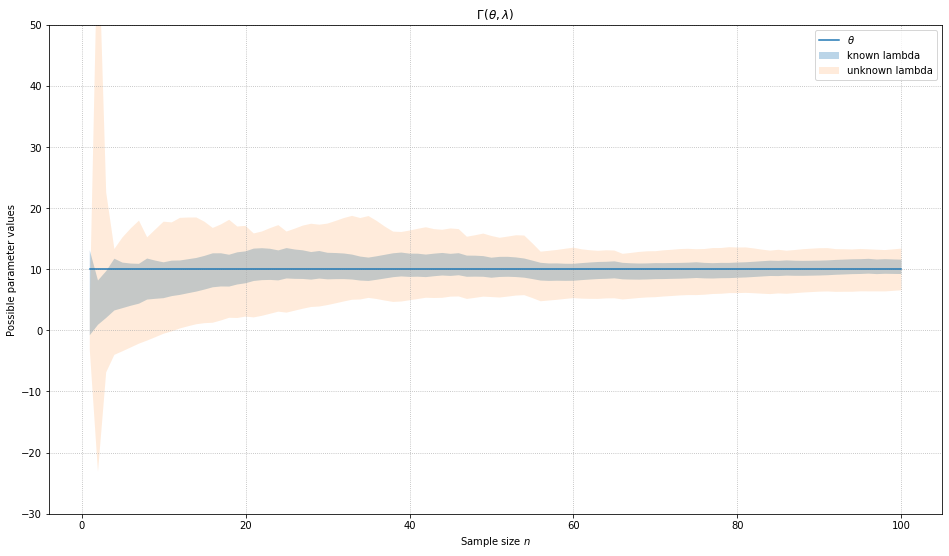

In [40]:
plt.figure(figsize=(16, 9))

plt.plot(np.arange(n)+ 1, np.zeros(n) + theta, label='$\\theta$')
plt.fill_between(np.arange(n) + 1, start_gamma_lambda, 
    end_gamma_lambda, label='known lambda', alpha=0.3)
plt.fill_between(np.arange(n) + 1, start_gamma_unknow, 
    end_gamma_unknow, label='unknown lambda', alpha=0.15)

plt.title('Г($\\theta, \\lambda$)', fontsize=12)

plt.xlabel('Sample size $n$')
plt.ylabel('Possible parameter values')
plt.ylim((theta-40, theta+40))

plt.legend()
plt.grid(ls=':')
plt.show()

## Сonclusion

1.1. In the first part of the task, we investigated the behavior of three confidence intervals of the $\theta$ parameter for uniform distribution. It was found that the confidence interval based on the statistics $X_{(n)}$ most precisely limits the parameter value, while having a high rate of convergence to the estimated parameter when the sample size increases.

1.2. The confidence interval based on the $\overline{X} $ statistics is stable relative to the estimate of the $\theta$ parameter, meaning that when the sample size increases, the accuracy of the estimate changes slightly. This can be explained by the fact that due to the property of uniform distribution, the average value of all values fluctuates around a certain value. Since in an explicit expression for a confidence interval we have a dependency of the form $\frac{\overline{X}\sqrt{n}}{\sqrt{n}}$, the width of the interval practically does not depend on the sample size.

1.3. Finally, the confidence interval for statistics $X_{(1)}$ has the worst estimation accuracy. Presumably, this can be explained by the fact that the first element of the variation series in the case of a uniform distribution contains insufficient information about the sample as a whole.

1.4. This different behavior of confidence intervals can be explained by the fact that when obtaining their values, we used a method that does not allow, in general, to obtain an exact confidence interval (the solution using the Chebyshev inequality). That is why, for example, in the case of statistics $X_{(1)}$, we observe a confidence interval, the probability of getting the parameter value in which is high, but due to its size, this interval does not make practical sense.

2.1 An investigation of the asymptotic confidence interval for the Cauchy distribution reveals a relatively good convergence of the interval boundaries to the parameter itself. However, there are often situations when the parameter itself does not fall within the estimated range. This can be explained by the presence of the famous heavy tails in the Cauchy distribution, which significantly shift the boundaries of the confidence interval. This problem can be solved in practice (though not always) by excluding several maximum and minimum values in the sample.

3.1 The length of the investigated asymptotic confidence interval for the Poisson distribution converges quite quickly to a certain value, slightly more accurately estimating this parameter later.

4.1 In the last part, we investigated two asymptotic confidence intervals of the parameter $ \theta$ for the gamma distribution in the case when the parameter $\lambda$ is known or not. It is clearly seen that when the parameter $\lambda$ is known, the asymptotic confidence interval evaluates the parameter much more accurately. This is quite natural, because knowing the value of one of the two parameters, we restrict the parametric family of distributions, one of the parameters of which we estimate.

## Task 2

For $n = 100$, estimate the probability of getting the true value of $\theta$ in the interval (in each case). To do this, generate a lot of samples (suggest how many samples you need), build intervals for each of them, and determine how many times the true value of $\theta$ falls into the intervals.

## Preliminary considerations

It is necessary to understand how many samples to generate in order to get a Bernoullian sample for which the probability will be calculated if the parameter value falls or does not fall within the confidence interval. Here we can use the knowledge of the asymptotic confidence interval for sampling from the Bernoulli distribution with the parameter $\theta$. It is equal to $\left(\hat{\theta}_n - \sqrt{\frac{\hat{\theta}_n(1 - \hat{\theta}_n)}{n}}u_{\frac{1+\gamma}{2}}, \hat{\theta}_n - \sqrt{\frac{\hat{\theta}_n(1 - \hat{\theta}_n)}{n}}u_{\frac{1-\gamma}{2}})\right)$.

So, we have three values: the confidence level $\alpha$ (the probability of falling within a given interval), the width of the interval, taking into account the errors, and the size of the $n$ sample. Clearly, given $\alpha$, we want to make the interval as small as possible, which means that we can get some values for $n$from here. That is, we can say that the width of the interval in order of magnitude is related to the sample size as $2\sqrt{\frac{1}{4 n}}$ in the case of the Bernoulli distribution. The two as a multiplier occurs as an estimate of the values of the symmetric $0.025$ and $0.975$ - quantiles of the standard normal distribution between which $95 \%$ of the probability mass is enclosed. Taking $1\%$ as the error, we get: $0.02 = 2 \ sqrt{\frac{1}{4 n}}$, where we get an estimate for the sample size equal to $2500$.

Declare a variable containing the number of samples

In [46]:
amount_samples = 2500

We calculate the probability of the parameter value falling into confidence intervals based on three different statistics in the case of a uniform distribution.

In [48]:
#number of hits (successes) in the interval according to x_mean statistics
first_num_success = 0
second_num_success = 0 #X_(1)
third_num_success = 0 #X_(n)

#a new sample is generated when the function below is called
for j in range(amount_samples):
    first_start, first_end, second_start, second_end, third_start, third_end = confidence_interval_uniform()
    if first_start[-1] < theta and first_end[-1] > theta:
        first_num_success += 1
    if second_start[-1] < theta and second_end[-1] > theta:
        second_num_success += 1
    if third_start[-1] < theta and third_end[-1] > theta:
        third_num_success += 1

print('Uniform distribution:\n')
#divide the number of successes by the number of samples
print('X_mean: probability = {}'.format(first_num_success/amount_samples))
print('X_(1): probability = {}'.format(second_num_success/amount_samples))
print('X_(n): probability res = {}'.format(third_num_success/amount_samples))

Uniform distribution:

X_mean: probability = 1.0
X_(1): probability = 0.9504
X_(n): probability res = 0.9464


Calculate the probability of falling into the confidence interval for the Cauchy distribution.

In [49]:
cauchy_success = 0

for i in range(amount_samples):
    start_confidence_cauchy, end_confidence_cauchy = confidence_interval_cauchy()
    if start_confidence_cauchy[-1] < end_confidence_cauchy[-1] > theta:
         cauchy_success += 1
            
print('Cauchy distribution: probability = {}'.format(cauchy_success/amount_samples))

Cauchy distribution: probability = 0.6836


Find the probability for the Poisson distribution

In [50]:
poiss_success = 0
   
for i in range(amount_samples):
    start_confidence_poiss, end_confidence_poiss = confidence_interval_poiss() 
    if start_confidence_poiss[-1] < theta and end_confidence_poiss[-1] > theta:
        poiss_success += 1
        
print('Poisson distribution: probability = {}'.format(poiss_success/amount_samples))

Poisson distribution: probability = 0.9524


We get the probabilities of getting the parameter $\theta$ in the confidence interval for the gamma distribution, when the parameter $\lambda$ is known or not.

In [51]:
gamma_lambda_success = 0
gamma_unknow_success = 0

for i in range(amount_samples):
    start_gamma_lambda, end_gamma_lambda, start_gamma_unknow, end_gamma_unknow = confidence_interval_gamma()
    if start_gamma_lambda[-1] < theta and end_gamma_lambda[-1] > theta:
        gamma_lambda_success += 1
    if start_gamma_unknow[-1] < theta and end_gamma_unknow[-1] > theta:
        gamma_unknow_success += 1
        
print('Gamma distribution:\n')
print('lambda: probability = {}'.format(gamma_lambda_success/amount_samples))
print('unknow: probability = {}'.format(gamma_unknow_success/amount_samples))

Gamma distribution:

lambda: probability = 0.964
unknow: probability = 0.9644


## Сonclusion

In the process of solving the problem, an estimate was obtained for the number of samples needed to study the behavior of the parameter of a particular distribution relative to the confidence interval of the confidence level $\alpha = 0.95$. In the case of a uniform distribution, confidence intervals based on the statistics $X_ {(1)}$ and $X_ {(n)}$ give a probability value close to $\alpha$. In the case of a confidence interval according to the statistics $\overline{X}$, the probability is almost equal to one, which can be explained by the relative constancy of the interval width and its weak dependence on the sample size observed earlier in the task $1$.

However, the obtained estimate reveals its inaccuracy when investigating the behavior of the Cauchy distribution parameter, and in this case it is necessary to increase the number of samples. This behavior of the parameter can be explained in the same way as task 1 for the Cauchy distribution.

In the case of the Poisson distribution and the Gamma distribution (as in the case of the known $\lambda$, and in the case of the unknown), the estimate for the number of samples gives a probability value close to $\alpha$.